# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | yeppoon
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | muisne
Processing Record 5 of Set 1 | pacific grove
Processing Record 6 of Set 1 | magadan
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | xilitla
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | sekong
Processing Record 14 of Set 1 | new plymouth
Processing Record 15 of Set 1 | katabu
Processing Record 16 of Set 1 | freetown
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | mount isa
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | adamstown
Processing 

Processing Record 38 of Set 4 | vilyuchinsk
Processing Record 39 of Set 4 | warrenton
Processing Record 40 of Set 4 | sao felix do xingu
Processing Record 41 of Set 4 | asmara
Processing Record 42 of Set 4 | san antonio
Processing Record 43 of Set 4 | as sulayyil
Processing Record 44 of Set 4 | queenstown
Processing Record 45 of Set 4 | galliano
Processing Record 46 of Set 4 | rio preto da eva
Processing Record 47 of Set 4 | smithers
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | sokone
Processing Record 0 of Set 5 | la'ie
Processing Record 1 of Set 5 | dire dawa
Processing Record 2 of Set 5 | murun-kuren
Processing Record 3 of Set 5 | anibare
City not found. Skipping...
Processing Record 4 of Set 5 | tazovsky
Processing Record 5 of Set 5 | xining
Processing Record 6 of Set 5 | broken hill
Processing Record 7 of Set 5 | mitrofanovka
Processing Record 8 of Set 5 | santiago
Processing Record 9 of Set 5 | la sarre
Processing Record 10 of Set 5 | jiangzi
Processing

Processing Record 32 of Set 8 | fuerte olimpo
Processing Record 33 of Set 8 | kashgar
Processing Record 34 of Set 8 | paradise point
Processing Record 35 of Set 8 | sorong
Processing Record 36 of Set 8 | karyes
Processing Record 37 of Set 8 | sanghar
Processing Record 38 of Set 8 | colonia
Processing Record 39 of Set 8 | lalago
Processing Record 40 of Set 8 | trujillo
Processing Record 41 of Set 8 | hailey
Processing Record 42 of Set 8 | huicungo
Processing Record 43 of Set 8 | creve coeur
Processing Record 44 of Set 8 | kachug
Processing Record 45 of Set 8 | parintins
Processing Record 46 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 47 of Set 8 | i-n-salah
Processing Record 48 of Set 8 | pama
Processing Record 49 of Set 8 | aykhal
Processing Record 0 of Set 9 | nishiwaki
Processing Record 1 of Set 9 | floro
Processing Record 2 of Set 9 | lerwick
Processing Record 3 of Set 9 | caleta de carquin
Processing Record 4 of Set 9 | beau vallon
Processing Record 5 of Set

Processing Record 22 of Set 12 | bethanie
Processing Record 23 of Set 12 | cheria
Processing Record 24 of Set 12 | muswellbrook
Processing Record 25 of Set 12 | prince albert
Processing Record 26 of Set 12 | tafuna
Processing Record 27 of Set 12 | san marcos
Processing Record 28 of Set 12 | saint-joseph
Processing Record 29 of Set 12 | ilha de mocambique
Processing Record 30 of Set 12 | talakan
Processing Record 31 of Set 12 | carutapera
Processing Record 32 of Set 12 | nikel
Processing Record 33 of Set 12 | qarchi gak
Processing Record 34 of Set 12 | sliven
Processing Record 35 of Set 12 | gwadar
Processing Record 36 of Set 12 | golub-dobrzyn
Processing Record 37 of Set 12 | woolgoolga
Processing Record 38 of Set 12 | barah
Processing Record 39 of Set 12 | goz beida
Processing Record 40 of Set 12 | kupang
Processing Record 41 of Set 12 | atrauli
Processing Record 42 of Set 12 | batken
Processing Record 43 of Set 12 | sidrolandia
Processing Record 44 of Set 12 | la foa
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Windspeed     575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,grytviken,-54.2811,-36.5092,31.12,91,57,11.61,GS,1701986520
1,yeppoon,-23.1333,150.7333,78.58,64,37,17.78,AU,1701986810
2,lihue,21.9789,-159.3672,80.37,71,75,8.05,US,1701986678
3,muisne,0.6000,-80.0333,78.57,85,78,8.19,EC,1701986810
4,pacific grove,36.6177,-121.9166,62.42,69,20,6.91,US,1701986707


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,31.12,91,57,11.61,GS,1701986520
1,yeppoon,-23.1333,150.7333,78.58,64,37,17.78,AU,1701986810
2,lihue,21.9789,-159.3672,80.37,71,75,8.05,US,1701986678
3,muisne,0.6000,-80.0333,78.57,85,78,8.19,EC,1701986810
4,pacific grove,36.6177,-121.9166,62.42,69,20,6.91,US,1701986707


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

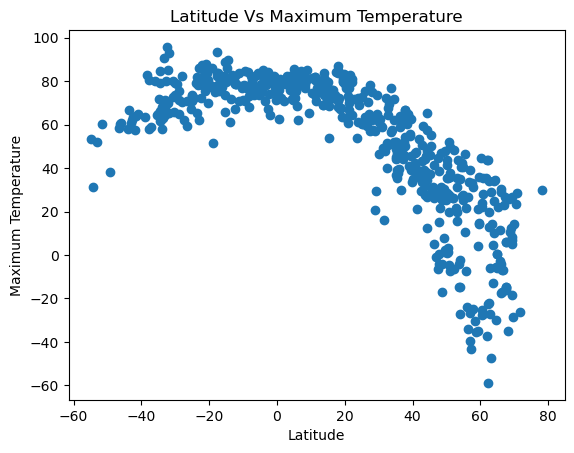

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude Vs Maximum Temperature")                                               

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

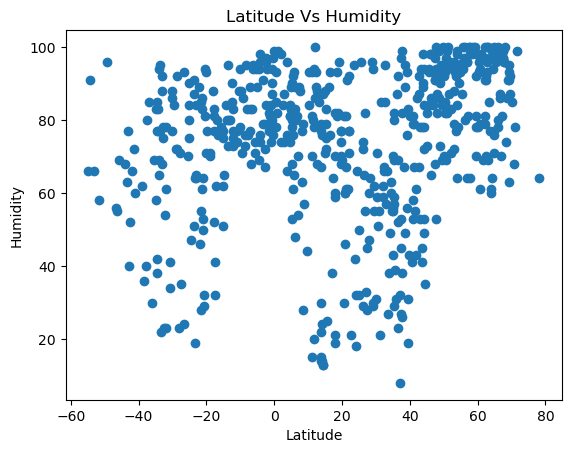

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs Humidity")      

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

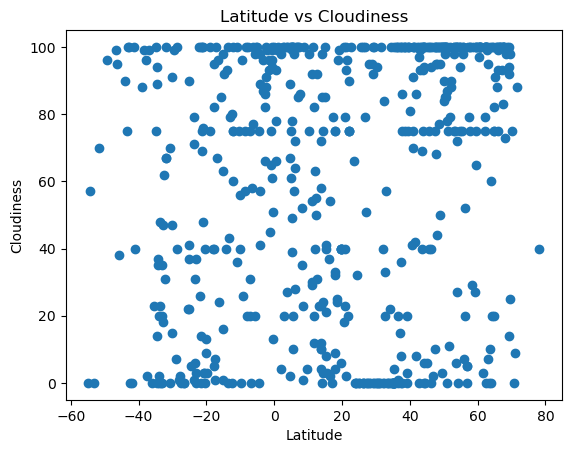

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")    

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

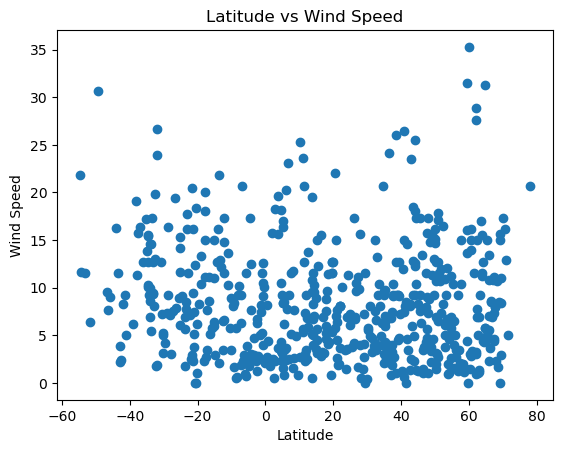

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Windspeed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")    

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots

def lin_reg_plot(x_axis, y_axis, x_label, y_label,text_spot):
    # Perform a linear regression on temperature vs. latitude
    slope, intercept, rvalue, __, ___ = linregress(x_axis, y_axis)
    regressed_values = (x_axis * slope) + intercept
    line_eq = f'y = {round(slope, 2)}x + {round(intercept,2)}'

    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regressed_values, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} Vs {y_label}")
    plt.grid
    plt.annotate(line_eq, text_spot, fontsize=15, color='red')
    #plt.annotate(f'r = {round(rvalue, 2)}', (20, 10), fontsize=15, color='red')

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
2,lihue,21.9789,-159.3672,80.37,71,75,8.05,US,1701986678
3,muisne,0.6000,-80.0333,78.57,85,78,8.19,EC,1701986810
4,pacific grove,36.6177,-121.9166,62.42,69,20,6.91,US,1701986707
5,magadan,59.5667,150.8000,14.40,81,100,16.04,RU,1701986810
6,bilibino,68.0546,166.4372,-34.96,100,73,2.28,RU,1701986810


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,31.12,91,57,11.61,GS,1701986520
1,yeppoon,-23.1333,150.7333,78.58,64,37,17.78,AU,1701986810
10,invercargill,-46.4000,168.3500,60.12,55,95,7.70,NZ,1701986768
11,port elizabeth,-33.9180,25.5701,68.09,94,20,6.91,ZA,1701986612
12,sekong,-6.3996,106.0252,74.46,95,100,2.95,ID,1701986811


###  Temperature vs. Latitude Linear Regression Plot

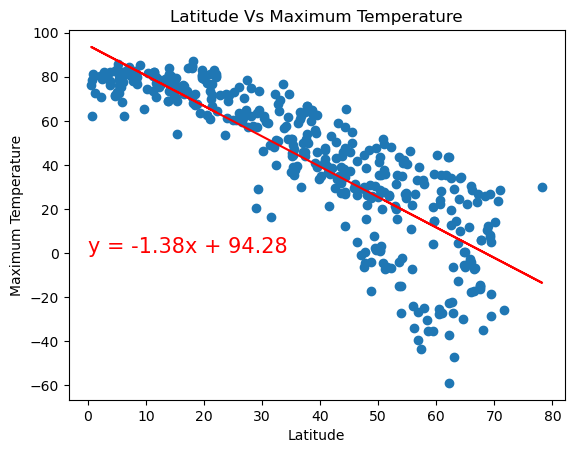

In [59]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude","Maximum Temperature",(0,0))

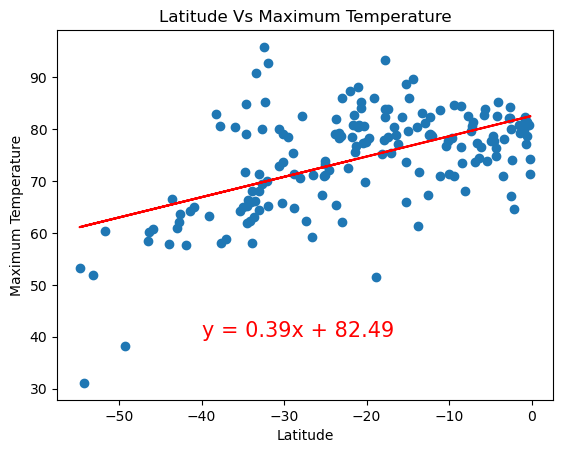

In [61]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude","Maximum Temperature",(-40,40))

**Discussion about the linear relationship:** Comparing both linear relationships, we can see the two hemispheres differ. The northern hemisphere has a strong relationship with a negative slope. Whereas the southern hemisphere is weak but has a positive slope. Thus, as you increase the latitude, the temperature will drop in the northern hemisphere. If you increase the latitude in the southern hemisphere, the temperature will go up.

### Humidity vs. Latitude Linear Regression Plot

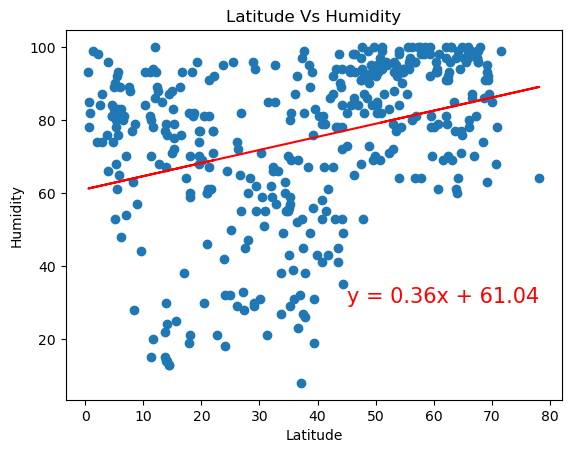

In [64]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude","Humidity",(45,30))

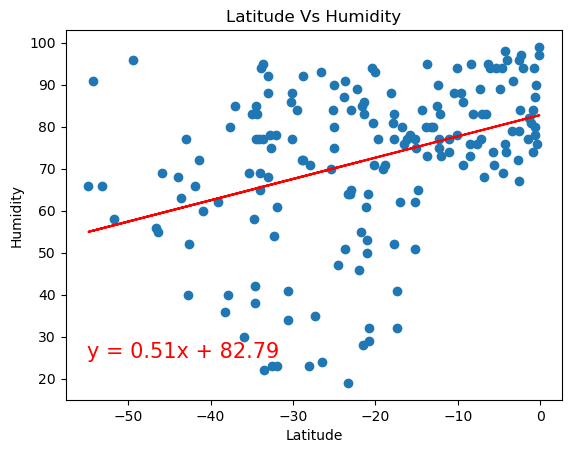

In [68]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude","Humidity",(-55,25))

**Discussion about the linear relationship:** Comparing both linear relationships, we can see that both hemispheres have weak and positive correlations. Thus, as you increase the latitude, in either hemisphere, there will be a humidity increase. With the northern hemisphere having less of an incerase compared to the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

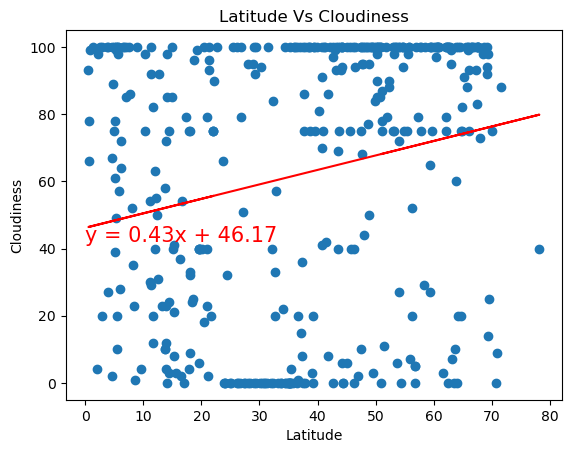

In [72]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude","Cloudiness",(0,42))

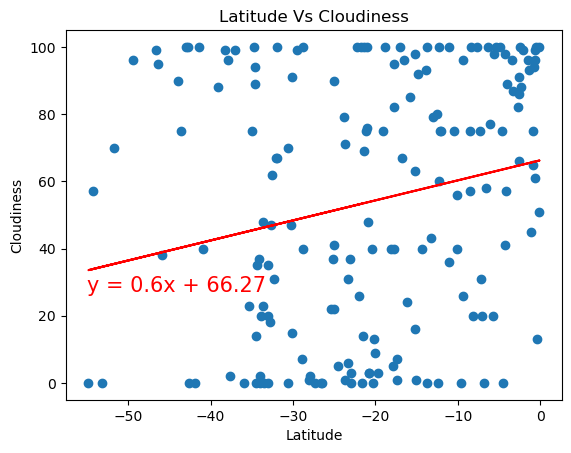

In [77]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude","Cloudiness",(-55,27))

**Discussion about the linear relationship:** Comparing both linear relationships, we can see that both hemispheres have very weak and positive correlations. The correlations for both hemispheres are the weakest compared to the other parameters we compared the latitude to. As you increase the latitude, in either hemisphere, there will be an increase in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

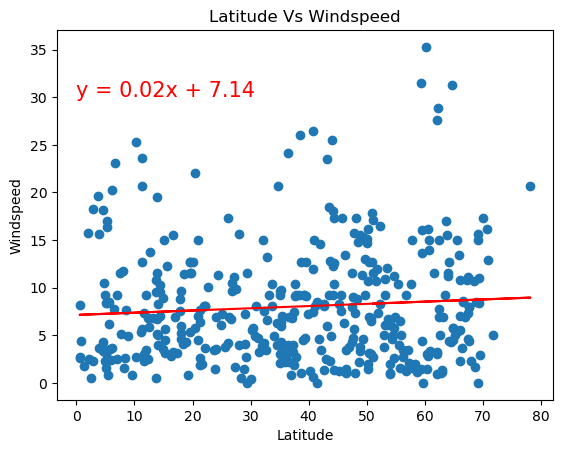

In [82]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Windspeed"], "Latitude","Windspeed",(0,30))

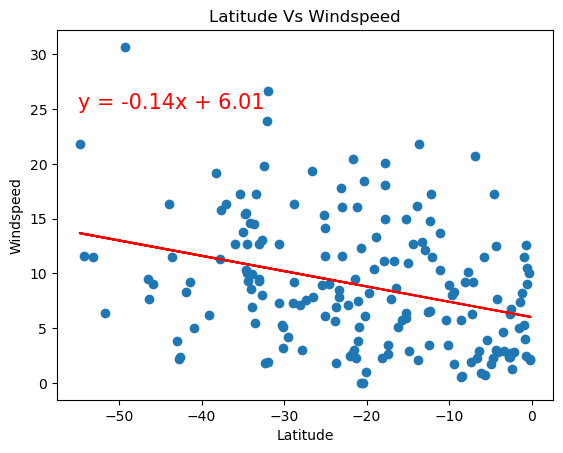

In [86]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Windspeed"], "Latitude","Windspeed",(-55,25))

**Discussion about the linear relationship:** Comparing both linear relationships, we can see that the northern hemispheres have a weak and positive correlation, with a very small slope. The southern hemisphere has a weaker and negative correlation. Thus, as you increase the latitude, the windspeed will increase in the northern hemisphere very slightly. If you increase the latitude in the southern hemisphere, the temperature will drop slightly as well.